In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [3]:
price_data = [pd.read_csv(f"utc_xchange_v1.2/data/case1/prices_{year}.csv", header = 0, names = ["Daily Price"]) for year in range(2016, 2022)]
rain_data = [pd.read_csv(f"utc_xchange_v1.2/data/case1/rain_{year}.csv", header = 0, names = ["Historical Monthly Rain"]) for year in range(2016, 2022)]

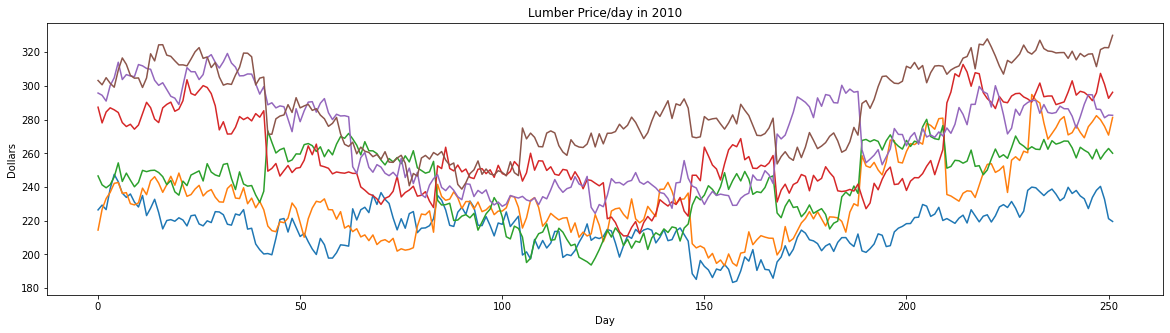

In [151]:
plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel("Day")
plt.ylabel("Dollars")
plt.title("Lumber Price/day in 2010")
plt.plot(price_data[0]["Daily Price"])
plt.plot(price_data[1]["Daily Price"])
plt.plot(price_data[2]["Daily Price"])
plt.plot(price_data[3]["Daily Price"])
plt.plot(price_data[4]["Daily Price"])
plt.plot(price_data[5]["Daily Price"])
plt.show()

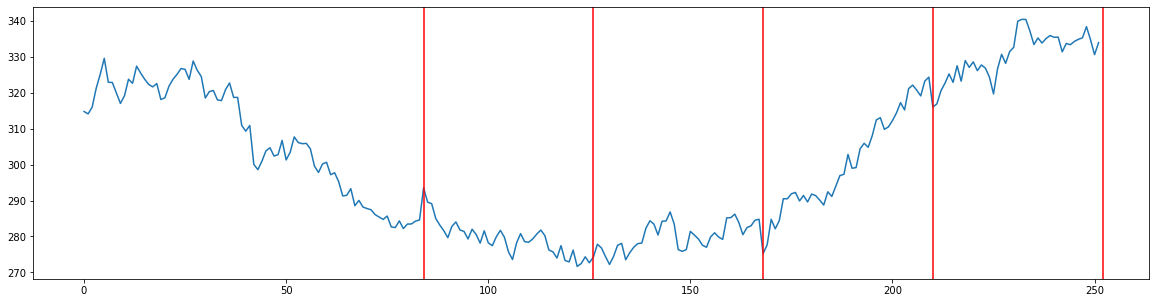

In [6]:
average_price_data = (price_data[0] + price_data[1] + price_data[2] + price_data[3] + price_data[4] + price_data[5])/5
plt.plot(average_price_data)
plt.axvline(84, c="red")
plt.axvline(126, c="red")
plt.axvline(168, c="red")
plt.axvline(210, c="red")
plt.axvline(252, c="red")
plt.show()

In [368]:
average_price_data.groupby(average_price_data.index // 21).mean()

,Daily Price
0,321.376000
1,320.699429
2,302.276000
3,286.789238
4,282.398095
5,276.386571
6,278.902857
7,280.940286
8,289.241524
9,312.372857


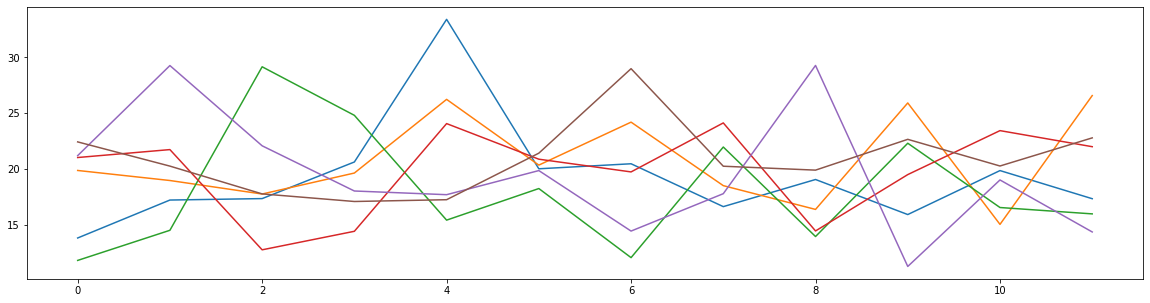

In [136]:
plt.plot(rain_data[0])
plt.plot(rain_data[1])
plt.plot(rain_data[2])
plt.plot(rain_data[3])
plt.plot(rain_data[4])
plt.plot(rain_data[5])
plt.show()

In [144]:
monthly_avg = []
for i in range(0, len(price_data)):
    monthly_avg.append(price_data[i].groupby(price_data[i].index // 21).mean())

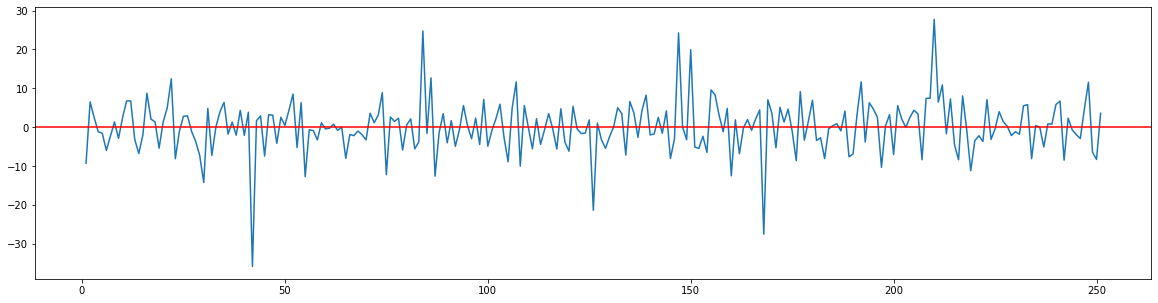

In [169]:
plt.plot(price_data[6]["Differential"])
plt.axhline(price_data[6]["Differential"].mean(), c="red")

In [205]:
monthly_avg_list = np.empty([0])
monthly_rain_list = np.empty([0])
for i in range(1, len(monthly_avg)):
    monthly_avg_list  = np.append(monthly_avg_list , monthly_avg[i]["Daily Price"])
    monthly_rain_list = np.append(monthly_rain_list, rain_data[i])
#for i in range(0, len(avg_monthly)):

In [276]:
import statsmodels.api as sm
X = monthly_rain_list.reshape(-1,1)
X = sm.add_constant(X)
Y = monthly_avg_list.reshape(-1,1)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     11.58
Date:                Thu, 31 Mar 2022   Prob (F-statistic):            0.00122
Time:                        01:33:31   Log-Likelihood:                -283.49
No. Observations:                  60   AIC:                             571.0
Df Residuals:                      58   BIC:                             575.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.1337     16.474     12.330      0.000     170.157     236.110
x1             2.7589      0.811      3.402      0.001       1.136       4.382
==============================================================================
Omnibus:                        1.971   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.469
Skew:                           0.176   Prob(JB):                        0.480
Kurtosis:                       2.319   Cond. No.                         93.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

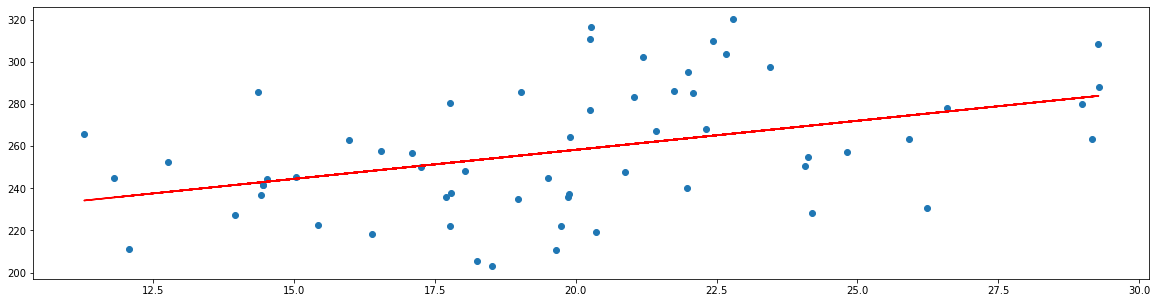

In [275]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], predictions, color='red')
plt.show()

In [4]:
for i in range(0, len(price_data)):
    price_data[i]["Month"] = (price_data[i].index/21).values.astype(int)
    price_data[i]["Year"] = i
    price_data[i]["April"] = price_data[i].loc[83, "Daily Price"]
    price_data[i]["June"] = price_data[i].loc[125, "Daily Price"]
    price_data[i]["Aug"] = price_data[i].loc[167, "Daily Price"]  
    price_data[i]["Oct"] = price_data[i].loc[209, "Daily Price"] 
    price_data[i]["Dec"] = price_data[i].loc[251, "Daily Price"]

In [10]:
price_data[0].loc[84, "Daily Price"]

235.01

In [5]:
total_price = pd.DataFrame()
for i in range(0, len(price_data)):
    total_price = total_price.append(price_data[i])
total_price.index = range(0,1512)

In [6]:
for i in range(0, len(rain_data)):
    rain_data[i]["Month"] = rain_data[i].index
    rain_data[i]["Year"] = i
total_rain = pd.DataFrame()
for i in range(0, len(rain_data)):
    total_rain = total_rain.append(rain_data[i])
total_data = pd.merge(total_price, total_rain, on = ["Month", "Year"], how = "left")
total_data

,Daily Price,Month,Year,April,June,Aug,Oct,Dec,Historical Monthly Rain
0,226.44,0,0,221.23,210.73,185.91,220.15,219.58,13.82
1,229.29,0,0,221.23,210.73,185.91,220.15,219.58,13.82
2,226.62,0,0,221.23,210.73,185.91,220.15,219.58,13.82
3,239.00,0,0,221.23,210.73,185.91,220.15,219.58,13.82
4,247.54,0,0,221.23,210.73,185.91,220.15,219.58,13.82
...,...,...,...,...,...,...,...,...,...
1507,311.45,11,5,260.49,265.63,280.89,311.71,330.02,22.79
1508,321.59,11,5,260.49,265.63,280.89,311.71,330.02,22.79
1509,322.77,11,5,260.49,265.63,280.89,311.71,330.02,22.79
1510,322.69,11,5,260.49,265.63,280.89,311.71,330.02,22.79


In [560]:
normalized_total_data = (total_data - total_data.mean())/total_data.std()
normalized_total_data["Month Squared"] = normalized_total_data["Month"] ** 2
normalized_total_data

,Daily Price,Differential,Month,Year,Historical Monthly Rain,Day of Month,Day of Week,Month Squared
0,-0.752556,NaN,-1.592728,-1.463366,-1.325576,-1.650899,-1.412111,2.536783
1,-0.664680,0.417474,-1.592728,-1.463366,-1.325576,-1.485809,-0.705354,2.536783
2,-0.747006,-0.411036,-1.592728,-1.463366,-1.325576,-1.320720,0.001402,2.536783
3,-0.365285,1.847854,-1.592728,-1.463366,-1.325576,-1.155630,0.708159,2.536783
4,-0.101966,1.271500,-1.592728,-1.463366,-1.325576,-0.990540,1.414916,2.536783
...,...,...,...,...,...,...,...,...
1507,1.868612,-1.152492,1.592728,1.463366,0.681857,0.990540,0.001402,2.536783
1508,2.181265,1.511648,1.592728,1.463366,0.681857,1.155630,0.708159,2.536783
1509,2.217649,0.166820,1.592728,1.463366,0.681857,1.320720,1.414916,2.536783
1510,2.215182,-0.022296,1.592728,1.463366,0.681857,1.485809,-1.412111,2.536783


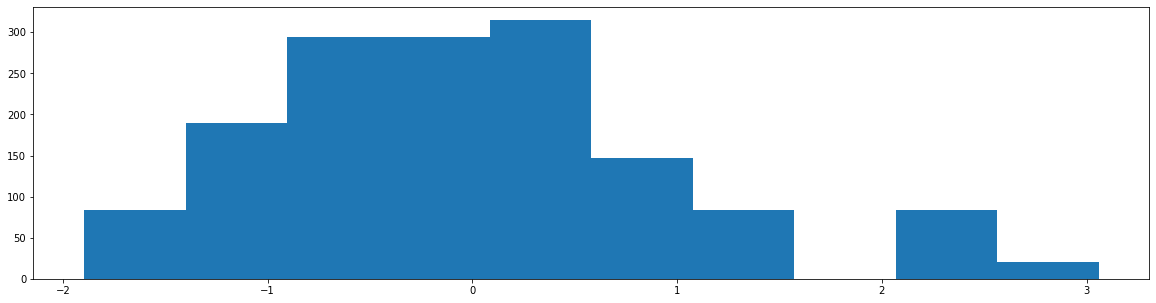

In [282]:
plt.hist(normalized_total_data["Historical Monthly Rain"])
plt.show()

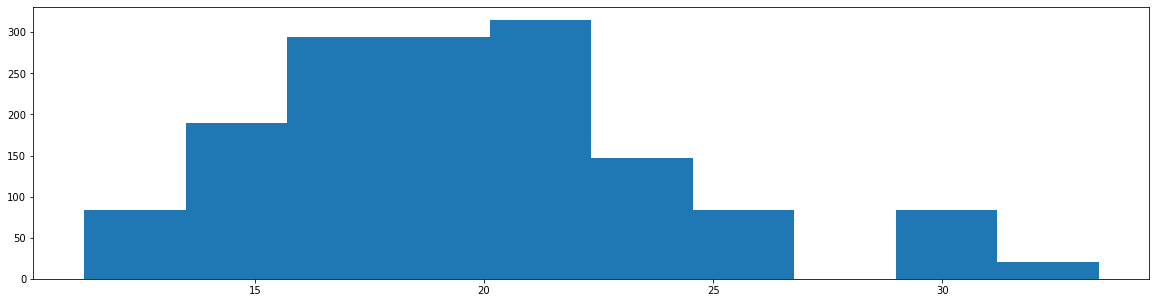

In [310]:
plt.hist(total_data["Historical Monthly Rain"])
plt.show()

In [352]:
factors = normalized_total_data[["Month", "Month Squared","Year", "Historical Monthly Rain", "Month Quadrupled", "Month Cubed"]]
factors = sm.add_constant(factors)
output = normalized_total_data["Daily Price"]

model = sm.OLS(output, factors).fit()
predictions = model.predict(factors)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily Price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     2177.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:11:13   Log-Likelihood:                -428.89
No. Observations:                1512   AIC:                             871.8
Df Residuals:                    1505   BIC:                             909.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7270      0.016    -45.878      0.000      -0.758      -0.696
Month                       0.1207      0.021      5.658      0.000       0.079       0.163
Month Squared               1.0525      0.035     30.316      0.000       0.984       1.121
Year                        0.6968      0.008     83.909      0.000       0.681       0.713
Historical Monthly Rain     0.3427      0.008     40.896      0.000       0.326       0.359
Month Quadrupled           -0.1824      0.013    -13.711      0.000      -0.209      -0.156
Month Cubed                -0.0176      0.011     -1.596      0.111      -0.039       0.004
==============================================================================
Omnibus:                        8.176   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.119
Skew:                          -0.160   Prob(JB):                       0.0173
Kurtosis:                       2.838   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

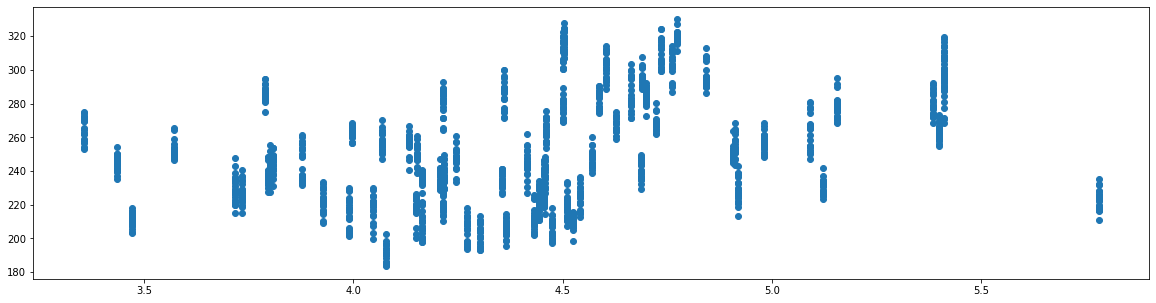

In [561]:
plt.scatter(np.sqrt(total_data["Historical Monthly Rain"]), total_data["Daily Price"])
plt.show()

In [562]:
residuals = total_data["Daily Price"] - (predictions * total_data["Daily Price"].std() + total_data["Daily Price"].mean())

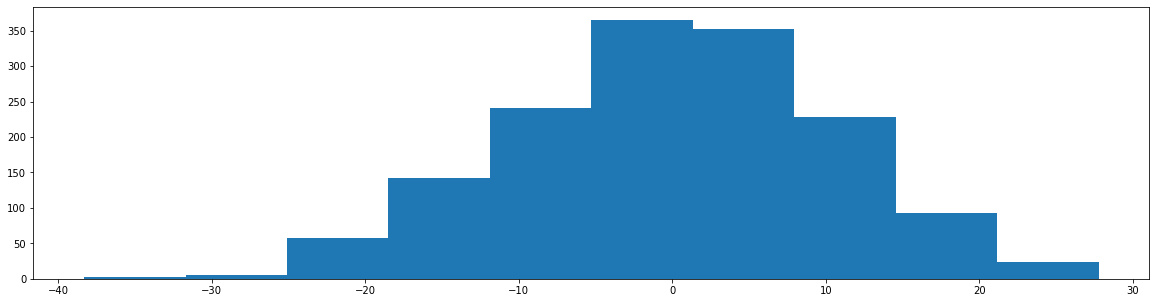

In [354]:
plt.hist(residuals)
plt.show()

2.0677169559156353e-15

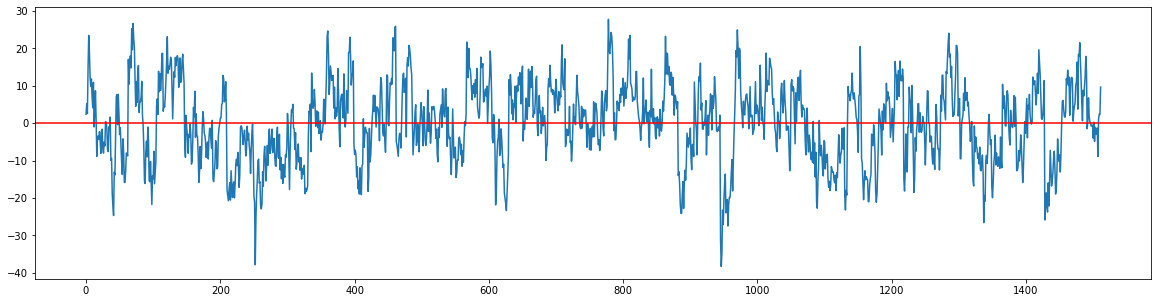

In [355]:
plt.plot(residuals.index.values, residuals)
plt.axhline(residuals.mean(), color = "red")
residuals.mean()

In [563]:
over = residuals[residuals > 20].index.values
under = residuals[residuals < -20].index.values

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

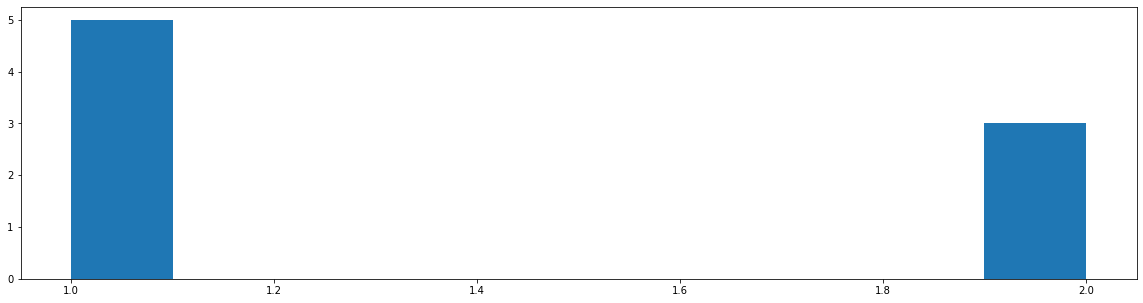

In [564]:
plt.hist(total_data.iloc[under,:].groupby(["Month"]).count()["Daily Price"])

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

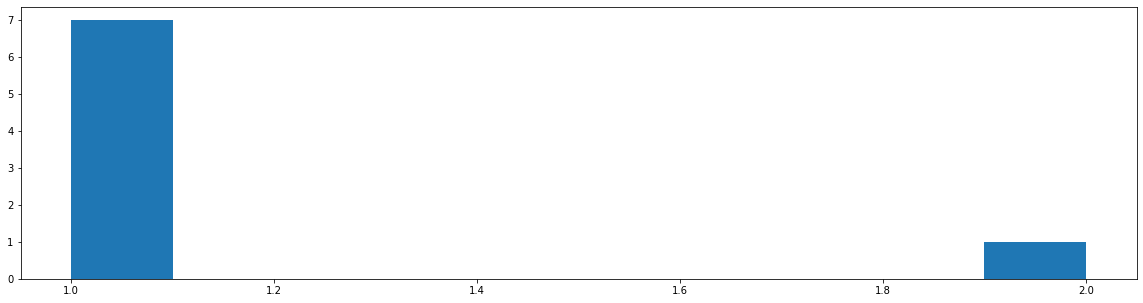

In [565]:
plt.hist(total_data.iloc[over,:].groupby(["Month"]).count()["Daily Price"])

In [578]:
normalized_total_data["Prev Price"] = normalized_total_data["Daily Price"].shift(1)
normalized_total_data.loc[0, "Prev Price"] = 0

In [567]:
factors = normalized_total_data[["Month", "Month Squared","Year", "Historical Monthly Rain", "Prev Price"]]
factors = sm.add_constant(factors)
output = normalized_total_data["Daily Price"]

model = sm.OLS(output, factors).fit()
predictions = model.predict(factors)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     8007.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:26:18   Log-Likelihood:                 362.89
No. Observations:                1512   AIC:                            -713.8
Df Residuals:                    1506   BIC:                            -681.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1267      0.011    -11.536      0.000      -0.148      -0.105
Month                       0.0261      0.005      5.188      0.000       0.016       0.036
Month Squared               0.1280      0.010     13.047      0.000       0.109       0.147
Year                        0.1480      0.011     13.815      0.000       0.127       0.169
Historical Monthly Rain     0.0875      0.007     13.313      0.000       0.075       0.100
Prev Price                  0.7877      0.014     57.699      0.000       0.761       0.815
==============================================================================
Omnibus:                      117.984   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.471
Skew:                          -0.082   Prob(JB):                    3.04e-135
Kurtosis:                       6.131   Cond. No.                         7.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5.921189464667502e-15

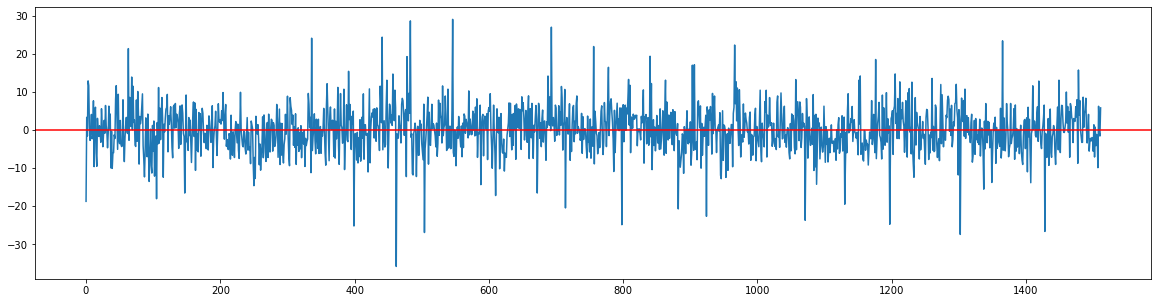

In [568]:
residuals = total_data["Daily Price"] - (predictions * total_data["Daily Price"].std() + total_data["Daily Price"].mean())
plt.plot(residuals.index.values, residuals)
plt.axhline(residuals.mean(), color = "red")
residuals.mean()

In [606]:
normalized_total_data["Rolling Window"] = normalized_total_data["Daily Price"].rolling(21).mean()
normalized_total_data.loc[0:21, "Rolling Window"] = normalized_total_data.loc[0, "Daily Price"]

In [607]:
factors = normalized_total_data[["Month", "Month Squared","Year", "Historical Monthly Rain", "Prev Price", "Rolling Window"]]
factors = sm.add_constant(factors)
output = normalized_total_data["Daily Price"]

model = sm.OLS(output, factors).fit()
predictions = model.predict(factors)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     6743.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:42:10   Log-Likelihood:                 371.00
No. Observations:                1512   AIC:                            -728.0
Df Residuals:                    1505   BIC:                            -690.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1141      0.011    -10.044      0.000      -0.136      -0.092
Month                       0.0294      0.005      5.794      0.000       0.019       0.039
Month Squared               0.1168      0.010     11.506      0.000       0.097       0.137
Year                        0.1293      0.012     11.125      0.000       0.107       0.152
Historical Monthly Rain     0.0897      0.007     13.670      0.000       0.077       0.103
Prev Price                  0.7443      0.017     42.906      0.000       0.710       0.778
Rolling Window              0.0691      0.017      4.030      0.000       0.035       0.103
==============================================================================
Omnibus:                      123.841   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.185
Skew:                          -0.071   Prob(JB):                    3.00e-151
Kurtosis:                       6.314   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [604]:
train = normalized_total_data.iloc[0:int(len(normalized_total_data) * 0.7),:]
test = normalized_total_data.iloc[int(len(normalized_total_data) * 0.7)::,:]

In [605]:
train_x = train[["Month", "Month Squared","Year", "Historical Monthly Rain","Prev Price", "Rolling Window"]]
train_x = sm.add_constant(train_x)
train_y = train["Daily Price"]

test_x = test[["Month", "Month Squared","Year", "Historical Monthly Rain", "Prev Price", "Rolling Window"]]
test_x = sm.add_constant(test_x)
test_y = test["Daily Price"]

model = sm.OLS(train_y, train_x).fit()
predictions = model.predict(test_x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     3613.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:41:45   Log-Likelihood:                 248.77
No. Observations:                1058   AIC:                            -483.5
Df Residuals:                    1051   BIC:                            -448.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.1115      0.013     -8.320      0.000      -0.138      -0.085
Month                       0.0291      0.007      3.921      0.000       0.015       0.044
Month Squared               0.1280      0.011     11.207      0.000       0.106       0.150
Year                        0.1717      0.021      8.099      0.000       0.130       0.213
Historical Monthly Rain     0.0912      0.008     11.590      0.000       0.076       0.107
Prev Price                  0.7651      0.018     43.354      0.000       0.730       0.800
Rolling Window              0.0126      0.025      0.497      0.619      -0.037       0.062
==============================================================================
Omnibus:                       82.788   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.620
Skew:                           0.016   Prob(JB):                     5.12e-94
Kurtosis:                       6.122   Cond. No.                         9.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

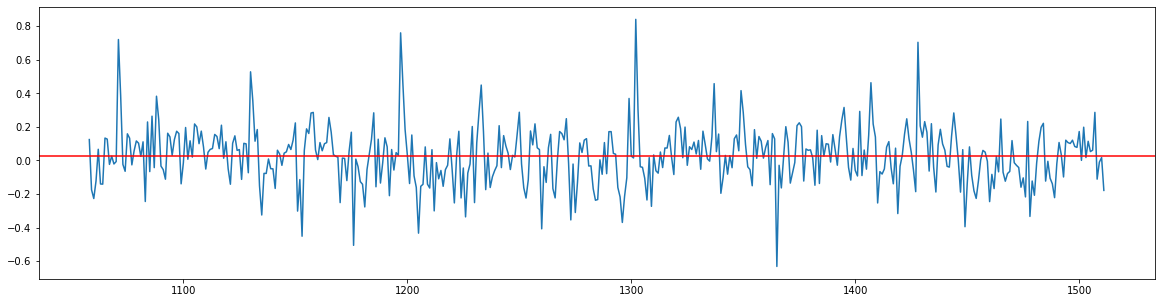

In [596]:
plt.plot(predictions - test_y)
plt.axhline((predictions - test_y).mean(), color = "red")
plt.show()

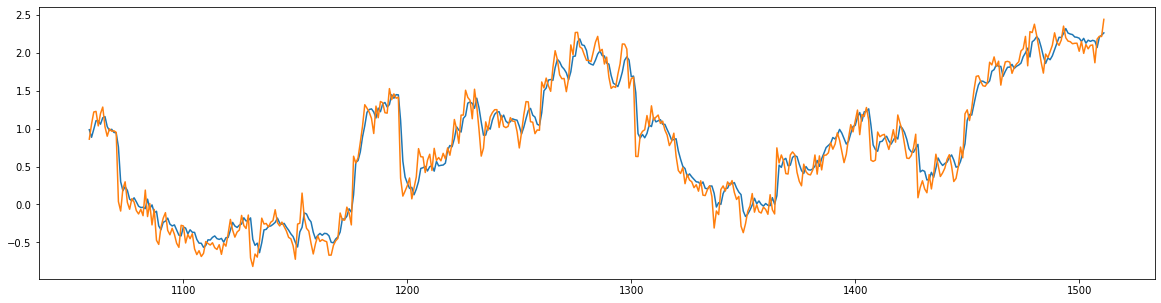

In [597]:
plt.plot(predictions)
plt.plot(test_y)
plt.show()

In [83]:
total_data["Month"] -= 5.5
total_data["Month Squared"] = total_data["Month"] ** 2

,Daily Price,Month,Year,April,May,Sep,Oct,Dec,Historical Monthly Rain,Month Squared
0,226.44,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25
1,229.29,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25
2,226.62,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25
3,239.00,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25
4,247.54,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25
...,...,...,...,...,...,...,...,...,...,...
1507,311.45,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25
1508,321.59,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25
1509,322.77,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25
1510,322.69,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25


In [29]:
X = total_data[["Month", "Month Squared","Year", "Daily Price", "Historical Monthly Rain"]]
X = sm.add_constant(X)
y = total_data["April"].rolling

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  April   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     369.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.04e-258
Time:                        10:33:51   Log-Likelihood:                -5871.8
No. Observations:                1512   AIC:                         1.176e+04
Df Residuals:                    1506   BIC:                         1.179e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     218.6366      4.374     49.985      0.000     210.057     227.216
Month                      -0.0462      0.091     -0.509      0.611      -0.224       0.132
Month Squared              -0.0945      0.053     -1.789      0.074      -0.198       0.009
Year                        6.9637      0.404     17.247      0.000       6.172       7.756
Daily Price                 0.0494      0.027      1.804      0.071      -0.004       0.103
Historical Monthly Rain    -0.5142      0.096     -5.372      0.000      -0.702      -0.326
==============================================================================
Omnibus:                      134.719   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.720
Skew:                           0.569   Prob(JB):                     2.46e-24
Kurtosis:                       2.344   Cond. No.                     3.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

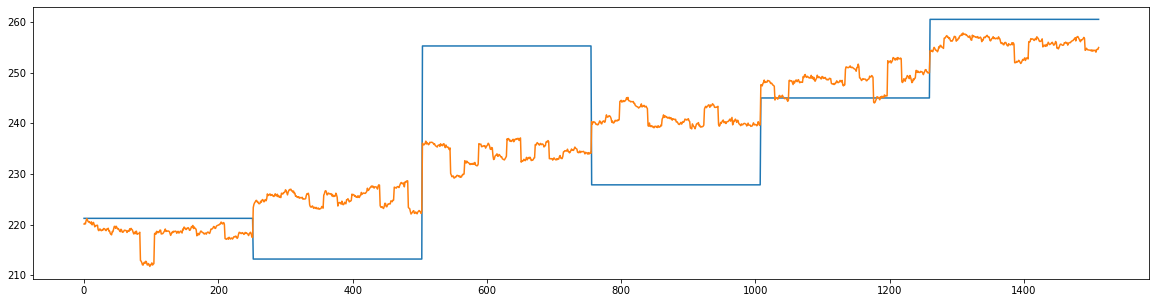

In [32]:
plt.plot(y)
plt.plot(predictions)
plt.show()

In [84]:
total_data["Rolling Window"] = total_data["Daily Price"].rolling(5).mean().fillna(total_data["Daily Price"])
total_data

,Daily Price,Month,Year,April,June,Sep,Oct,Dec,Historical Monthly Rain,Month Squared,Rolling Window
0,226.44,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25,226.440
1,229.29,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25,229.290
2,226.62,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25,226.620
3,239.00,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25,239.000
4,247.54,-5.5,0,221.23,210.73,185.91,220.15,219.58,13.82,30.25,233.778
...,...,...,...,...,...,...,...,...,...,...,...
1507,311.45,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25,317.218
1508,321.59,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25,317.680
1509,322.77,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25,318.752
1510,322.69,5.5,5,260.49,265.63,280.89,311.71,330.02,22.79,30.25,319.512


In [39]:
X = total_data[["Month", "Month Squared","Year", "Daily Price", "Historical Monthly Rain", "Rolling Window"]]
X = sm.add_constant(X)
y = total_data["April"].rolling

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


TypeError: object of type 'method' has no len()

In [7]:
total_data["April Shift"] = total_data["April"].shift(-168)
total_data["June Shift"] = total_data["June"].shift(-126)
total_data["Aug Shift"] = total_data["Aug"].shift(-84)
total_data["Oct Shift"] = total_data["Oct"].shift(-42)
total_data["Dec Shift"]= total_data["Dec"]

In [8]:
total_data = total_data.drop(["April","June","Aug","Oct","Dec"], axis = 1)

In [9]:
total_data

,Daily Price,Month,Year,Historical Monthly Rain,April Shift,June Shift,Aug Shift,Oct Shift,Dec Shift
0,226.44,0,0,13.82,221.23,210.73,185.91,220.15,219.58
1,229.29,0,0,13.82,221.23,210.73,185.91,220.15,219.58
2,226.62,0,0,13.82,221.23,210.73,185.91,220.15,219.58
3,239.00,0,0,13.82,221.23,210.73,185.91,220.15,219.58
4,247.54,0,0,13.82,221.23,210.73,185.91,220.15,219.58
...,...,...,...,...,...,...,...,...,...
1507,311.45,11,5,22.79,NaN,NaN,NaN,NaN,330.02
1508,321.59,11,5,22.79,NaN,NaN,NaN,NaN,330.02
1509,322.77,11,5,22.79,NaN,NaN,NaN,NaN,330.02
1510,322.69,11,5,22.79,NaN,NaN,NaN,NaN,330.02


In [92]:
X = total_data[["Month", "Month Squared","Year", "Daily Price", "Historical Monthly Rain", "Rolling Window"]]
X = sm.add_constant(X)
y = total_data["Dec Shift"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dec Shift   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     722.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:51:14   Log-Likelihood:                -6437.6
No. Observations:                1512   AIC:                         1.289e+04
Df Residuals:                    1505   BIC:                         1.293e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     220.8112      6.804     32.455      0.000     207.466     234.157
Month                      -0.0135      0.132     -0.102      0.918      -0.272       0.245
Month Squared              -0.0162      0.080     -0.204      0.839      -0.172       0.140
Year                       16.5048      0.614     26.865      0.000      15.300      17.710
Daily Price                 0.0289      0.073      0.396      0.692      -0.114       0.172
Historical Monthly Rain     0.5316      0.140      3.800      0.000       0.257       0.806
Rolling Window             -0.0053      0.075     -0.070      0.944      -0.152       0.141
==============================================================================
Omnibus:                      935.363   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.924
Skew:                           0.267   Prob(JB):                     2.71e-23
Kurtosis:                       1.832   Cond. No.                     5.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

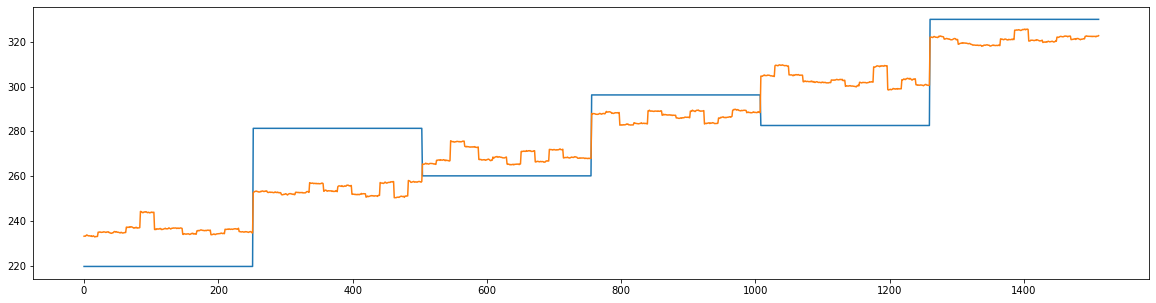

In [93]:
plt.plot(y)
plt.plot(predictions)
plt.show()

In [106]:
total_data["Dec Dist"] = 11 - (total_data["Month"] + 5.5)
total_data["April Dist"] = 3 - (total_data["Month"] + 5.5)
total_data

,Daily Price,Month,Year,Historical Monthly Rain,Month Squared,Rolling Window,April Shift,June Shift,Sep Shift,Oct Shift,Dec Shift,Dec Dist,April Dist
0,226.44,-5.5,0,13.82,30.25,226.440,221.23,210.73,185.91,220.15,219.58,11.0,3.0
1,229.29,-5.5,0,13.82,30.25,229.290,221.23,210.73,185.91,220.15,219.58,11.0,3.0
2,226.62,-5.5,0,13.82,30.25,226.620,221.23,210.73,185.91,220.15,219.58,11.0,3.0
3,239.00,-5.5,0,13.82,30.25,239.000,221.23,210.73,185.91,220.15,219.58,11.0,3.0
4,247.54,-5.5,0,13.82,30.25,233.778,221.23,210.73,185.91,220.15,219.58,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,311.45,5.5,5,22.79,30.25,317.218,NaN,NaN,NaN,NaN,330.02,0.0,-8.0
1508,321.59,5.5,5,22.79,30.25,317.680,NaN,NaN,NaN,NaN,330.02,0.0,-8.0
1509,322.77,5.5,5,22.79,30.25,318.752,NaN,NaN,NaN,NaN,330.02,0.0,-8.0
1510,322.69,5.5,5,22.79,30.25,319.512,NaN,NaN,NaN,NaN,330.02,0.0,-8.0


In [107]:
X = total_data[["Month", "Month Squared","Year", "Daily Price", "Historical Monthly Rain", "Rolling Window", "Dec Dist"]]
X = sm.add_constant(X)
y = total_data["Dec Shift"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dec Shift   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     722.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:55:14   Log-Likelihood:                -6437.6
No. Observations:                1512   AIC:                         1.289e+04
Df Residuals:                    1505   BIC:                         1.293e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.6914      0.427     32.033      0.000      12.853      14.530
Month                      37.6446      1.195     31.508      0.000      35.301      39.988
Month Squared              -0.0162      0.080     -0.204      0.839      -0.172       0.140
Year                       16.5048      0.614     26.865      0.000      15.300      17.710
Daily Price                 0.0289      0.073      0.396      0.692      -0.114       0.172
Historical Monthly Rain     0.5316      0.140      3.800      0.000       0.257       0.806
Rolling Window             -0.0053      0.075     -0.070      0.944      -0.152       0.141
Dec Dist                   37.6581      1.159     32.480      0.000      35.384      39.932
==============================================================================
Omnibus:                      935.363   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.924
Skew:                           0.267   Prob(JB):                     2.71e-23
Kurtosis:                       1.832   Cond. No.                     2.85e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

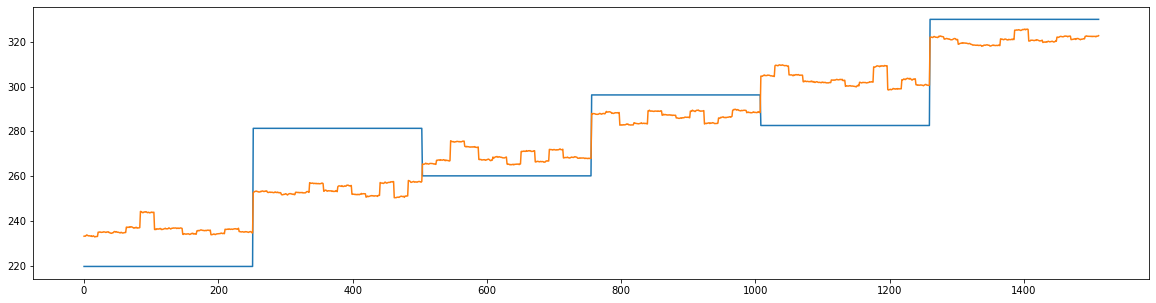

In [108]:
plt.plot(y)
plt.plot(predictions)
plt.show()

In [124]:
dec = pd.unique(total_data["June Shift"])
dec

array([210.73, 207.55, 208.49, 242.59, 228.33, 265.63,    nan])

In [115]:
total_data["Dec Shift"].loc[250:270]

250    219.58
251    219.58
252    281.31
253    281.31
254    281.31
255    281.31
256    281.31
257    281.31
258    281.31
259    281.31
260    281.31
261    281.31
262    281.31
263    281.31
264    281.31
265    281.31
266    281.31
267    281.31
268    281.31
269    281.31
270    281.31
Name: Dec Shift, dtype: float64

In [126]:
total_data["Historical Monthly Rain"]

0       13.82
1       13.82
2       13.82
3       13.82
4       13.82
        ...  
1507    22.79
1508    22.79
1509    22.79
1510    22.79
1511    22.79
Name: Historical Monthly Rain, Length: 1512, dtype: float64

In [10]:
total_data["Up Year"] = total_data["Year"] % 2

In [11]:
total_data["Prev"] = total_data["Daily Price"].shift(1).fillna(total_data["Daily Price"])
total_data["Next Rain"] = total_data["Historical Monthly Rain"].shift(21).fillna(total_data["Historical Monthly Rain"])

In [207]:
X = total_data[["Next Rain","Prev", "Month Squared", "Dec Dist", "Up Year"]].fillna(0)
X = sm.add_constant(X)
y = total_data["Dec Shift"].fillna(0)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Dec Shift   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1402.
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:25:24   Log-Likelihood:                -6153.2
No. Observations:                1512   AIC:                         1.232e+04
Df Residuals:                    1506   BIC:                         1.235e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            98.5381      3.483     28.295      0.000      91.707     105.369
Next Rain        -0.2599      0.083     -3.135      0.002      -0.423      -0.097
Prev              0.7038      0.014     50.837      0.000       0.677       0.731
Month Squared    -1.0862      0.041    -26.362      0.000      -1.167      -1.005
Dec Dist          0.0244      0.005      4.837      0.000       0.014       0.034
Up Year          36.5063      0.767     47.609      0.000      35.002      38.010
==============================================================================
Omnibus:                       54.932   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.516
Skew:                          -0.143   Prob(JB):                     6.43e-07
Kurtosis:                       2.391   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

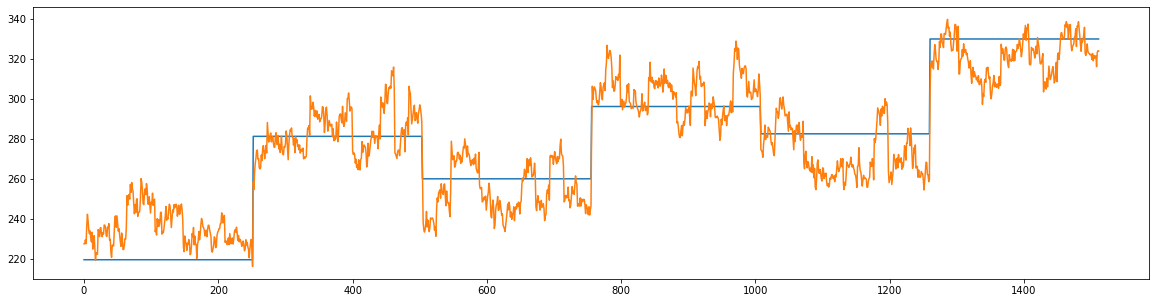

In [208]:
plt.plot(y)
plt.plot(predictions)
plt.show()

In [12]:
total_data["April Dist"] = (83 - total_data.index.values) % 252
total_data["June Dist"] = (83 + 42 - total_data.index.values) % 252
total_data["Aug Dist"] = (83 + 42 * 2 - total_data.index.values) % 252
total_data["Oct Dist"] = (83 + 42 * 3 - total_data.index.values) % 252
total_data["Dec Dist"] = (83 + 42 * 4 - total_data.index.values) % 252

0       251
1       250
2       249
3       248
4       247
       ... 
1507      4
1508      3
1509      2
1510      1
1511      0
Name: Dec Dist, Length: 1512, dtype: int64

In [218]:
old = total_data.iloc[:1344,:]
X = old[["Next Rain","Prev", "Month Squared", "April Dist", "Up Year"]]
X = sm.add_constant(X)
y = old["April Shift"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            April Shift   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     178.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.09e-145
Time:                        11:27:54   Log-Likelihood:                -5419.9
No. Observations:                1344   AIC:                         1.085e+04
Df Residuals:                    1338   BIC:                         1.088e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           137.2107      3.832     35.803      0.000     129.692     144.729
Next Rain         0.0252      0.083      0.304      0.761      -0.137       0.188
Prev              0.4138      0.015     27.827      0.000       0.385       0.443
Month Squared    -0.5653      0.048    -11.727      0.000      -0.660      -0.471
April Dist        0.0387      0.006      6.283      0.000       0.027       0.051
Up Year           3.8599      0.765      5.046      0.000       2.359       5.361
==============================================================================
Omnibus:                      179.183   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.225
Skew:                           0.253   Prob(JB):                     2.27e-13
Kurtosis:                       2.115   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

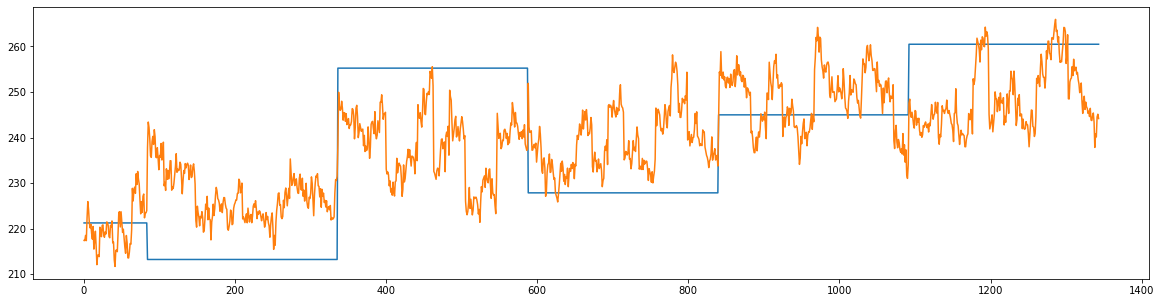

In [219]:
plt.plot(y)
plt.plot(predictions)
plt.show()

In [215]:
total_data["April Shift"][1340:1380]

1340    260.49
1341    260.49
1342    260.49
1343    260.49
1344       NaN
1345       NaN
1346       NaN
1347       NaN
1348       NaN
1349       NaN
1350       NaN
1351       NaN
1352       NaN
1353       NaN
1354       NaN
1355       NaN
1356       NaN
1357       NaN
1358       NaN
1359       NaN
1360       NaN
1361       NaN
1362       NaN
1363       NaN
1364       NaN
1365       NaN
1366       NaN
1367       NaN
1368       NaN
1369       NaN
1370       NaN
1371       NaN
1372       NaN
1373       NaN
1374       NaN
1375       NaN
1376       NaN
1377       NaN
1378       NaN
1379       NaN
Name: April Shift, dtype: float64

In [216]:
total_data.iloc[:1344,:]

,Daily Price,Month,Year,Historical Monthly Rain,Month Squared,Rolling Window,April Shift,June Shift,Sep Shift,Oct Shift,Dec Shift,Dec Dist,April Dist,Up Year,Prev,Next Rain,June Dist,Aug Dist,Oct Dist
0,226.44,-5.5,0,13.82,30.25,226.440,221.23,210.73,185.91,220.15,219.58,251,83,0,226.44,13.82,125,167,209
1,229.29,-5.5,0,13.82,30.25,229.290,221.23,210.73,185.91,220.15,219.58,250,82,0,226.44,13.82,124,166,208
2,226.62,-5.5,0,13.82,30.25,226.620,221.23,210.73,185.91,220.15,219.58,249,81,0,229.29,13.82,123,165,207
3,239.00,-5.5,0,13.82,30.25,239.000,221.23,210.73,185.91,220.15,219.58,248,80,0,226.62,13.82,122,164,206
4,247.54,-5.5,0,13.82,30.25,233.778,221.23,210.73,185.91,220.15,219.58,247,79,0,239.00,13.82,121,163,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,246.52,-2.5,5,17.09,6.25,249.674,260.49,265.63,280.89,311.71,330.02,172,4,1,248.05,17.77,46,88,130
1340,257.22,-2.5,5,17.09,6.25,249.348,260.49,265.63,280.89,311.71,330.02,171,3,1,246.52,17.77,45,87,129
1341,258.77,-2.5,5,17.09,6.25,250.266,260.49,265.63,280.89,311.71,330.02,170,2,1,257.22,17.77,44,86,128
1342,256.58,-2.5,5,17.09,6.25,253.428,260.49,265.63,280.89,311.71,330.02,169,1,1,258.77,17.77,43,85,127


In [235]:
total_data["Month"] -= 5.5
total_data["Rolling Window"] = total_data["Daily Price"].rolling(5).mean().fillna(total_data["Daily Price"])

In [13]:

df = pd.DataFrame()
a = pd.Series(pd.unique(total_data["April Shift"].dropna()))
b = pd.Series(pd.unique(total_data["June Shift"].dropna()))
c = pd.Series(pd.unique(total_data["Aug Shift"].dropna()))
d = pd.Series(pd.unique(total_data["Oct Shift"].dropna()))
e = pd.Series(pd.unique(total_data["Dec Shift"].dropna()))
df = df.append(a, ignore_index = True).append(b, ignore_index = True).append(c, ignore_index = True).append(d, ignore_index = True).append(e, ignore_index = True)

In [14]:
df.index = ["April", "June", "Aug", "Oct", "Dec"]
df.columns = ["2016","2017","2018","2019","2020","2021"]
df = df.T

In [17]:
total_data["Month"] -= 5.5

In [18]:
total_data["Month Squared"] = total_data["Month"] ** 2

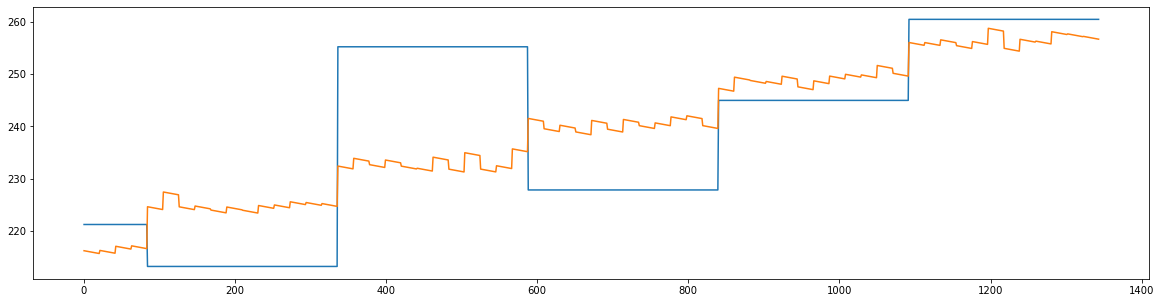

In [292]:
plt.plot(y)
plt.plot(predictions)
plt.show()

In [19]:
total_data

,Daily Price,Month,Year,Historical Monthly Rain,April Shift,June Shift,Aug Shift,Oct Shift,Dec Shift,Up Year,Prev,Next Rain,April Dist,June Dist,Aug Dist,Oct Dist,Dec Dist,Month Squared
0,226.44,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.44,13.82,83,125,167,209,251,30.25
1,229.29,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.44,13.82,82,124,166,208,250,30.25
2,226.62,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,0,229.29,13.82,81,123,165,207,249,30.25
3,239.00,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.62,13.82,80,122,164,206,248,30.25
4,247.54,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,0,239.00,13.82,79,121,163,205,247,30.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,311.45,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,1,319.06,20.27,88,130,172,214,4,30.25
1508,321.59,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,1,311.45,20.27,87,129,171,213,3,30.25
1509,322.77,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,1,321.59,20.27,86,128,170,212,2,30.25
1510,322.69,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,1,322.77,20.27,85,127,169,211,1,30.25


In [315]:
np.corrcoef(total_rain["Historical Monthly Rain"][1:],total_rain["Historical Monthly Rain"][:-1])

array([[ 1.        , -0.09446397],
       [-0.09446397,  1.        ]])

In [317]:
total_rain["Historical Monthly Rain"][:-1]

0     13.82
1     17.22
2     17.35
3     20.63
4     33.41
      ...  
6     28.99
7     20.25
8     19.90
9     22.66
10    20.27
Name: Historical Monthly Rain, Length: 71, dtype: float64

In [318]:
total_data

,Daily Price,Month,Year,Historical Monthly Rain,April Shift,June Shift,Aug Shift,Oct Shift,Dec Shift,April Dist,June Dist,Aug Dist,Oct Dist,Dec Dist,Rolling Window,Up Year,Prev,Next Rain,Month Squared
0,226.44,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,83,125,167,209,251,226.440,0,226.44,13.82,30.25
1,229.29,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,82,124,166,208,250,229.290,0,226.44,13.82,30.25
2,226.62,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,81,123,165,207,249,226.620,0,229.29,13.82,30.25
3,239.00,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,80,122,164,206,248,239.000,0,226.62,13.82,30.25
4,247.54,-5.5,0,13.82,221.23,210.73,185.91,220.15,219.58,79,121,163,205,247,233.778,0,239.00,13.82,30.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,311.45,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,88,130,172,214,4,317.218,1,319.06,20.27,30.25
1508,321.59,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,87,129,171,213,3,317.680,1,311.45,20.27,30.25
1509,322.77,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,86,128,170,212,2,318.752,1,321.59,20.27,30.25
1510,322.69,5.5,5,22.79,NaN,NaN,NaN,NaN,330.02,85,127,169,211,1,319.512,1,322.77,20.27,30.25


In [210]:
y = total_data["April Shift"].dropna()
X = total_data.loc[y.index, ["Next Rain", "Month", "Year", "Up Year", "Prev", "April Dist"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            April Shift   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     238.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          5.99e-207
Time:                        13:51:40   Log-Likelihood:                -5275.0
No. Observations:                1344   AIC:                         1.056e+04
Df Residuals:                    1337   BIC:                         1.060e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.5215      4.139     46.999      0.000     186.402     202.641
Next Rain      0.1931      0.074      2.621      0.009       0.049       0.338
Month          0.5453      0.108      5.065      0.000       0.334       0.757
Year           6.9536      0.313     22.190      0.000       6.339       7.568
Up Year        4.1745      0.687      6.079      0.000       2.827       5.522
Prev           0.0666      0.017      3.911      0.000       0.033       0.100
April Dist     0.0379      0.006      6.789      0.000       0.027       0.049
==============================================================================
Omnibus:                      232.011   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.653
Skew:                           0.614   Prob(JB):                     1.91e-28
Kurtosis:                       2.123   Cond. No.                     3.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [352]:
total_data["Next Rain"] = total_data["Historical Monthly Rain"].shift(-21).fillna(total_data["Historical Monthly Rain"])

In [384]:
total_data["Weighted Price"] = ((total_data["Prev"])/(total_data["April Dist"] + 0.01))

In [400]:
total_data = total_data.drop(["Weighted Price"], axis = 1)

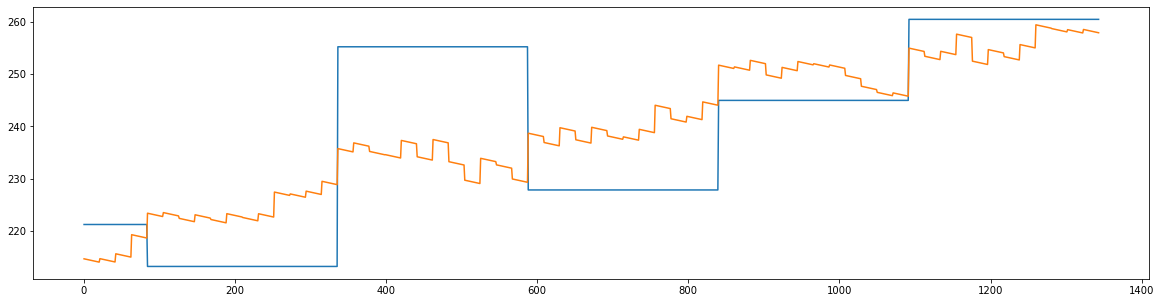

In [417]:
plt.plot(y)
plt.plot(predictions)
plt.show()

In [423]:
y = total_data["Daily Price"].dropna()
X = total_data.loc[y.index, ["Historical Monthly Rain", ""]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily Price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           2.25e-41
Time:                        20:48:46   Log-Likelihood:                -7314.5
No. Observations:                1512   AIC:                         1.463e+04
Df Residuals:                    1510   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     202.6110      3.560     56.909      0.000     195.627     209.595
Historical Monthly Rain     2.4432      0.176     13.891      0.000       2.098       2.788
==============================================================================
Omnibus:                       62.689   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.603
Skew:                           0.204   Prob(JB):                     3.06e-08
Kurtosis:                       2.381   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
total_data["Month"

,Daily Price,Month,Year,Historical Monthly Rain,April Shift,June Shift,Aug Shift,Oct Shift,Dec Shift,Up Year,Prev,Next Rain,April Dist,June Dist,Aug Dist,Oct Dist,Dec Dist,Month Squared
0,226.44,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.44,13.82,83,125,167,209,251,30.25
1,229.29,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.44,13.82,82,124,166,208,250,30.25
2,226.62,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,229.29,13.82,81,123,165,207,249,30.25
3,239.00,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.62,13.82,80,122,164,206,248,30.25
4,247.54,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,239.00,13.82,79,121,163,205,247,30.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,311.45,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,319.06,20.27,88,130,172,214,4,30.25
1508,321.59,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,311.45,20.27,87,129,171,213,3,30.25
1509,322.77,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,321.59,20.27,86,128,170,212,2,30.25
1510,322.69,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,322.77,20.27,85,127,169,211,1,30.25


In [56]:
y = total_data["Daily Price"].dropna()
X = total_data.loc[y.index, ["Historical Monthly Rain", "Month Squared", "Year"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     3539.
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:06:09   Log-Likelihood:                -5829.5
No. Observations:                1512   AIC:                         1.167e+04
Df Residuals:                    1508   BIC:                         1.169e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     150.2379      1.449    103.682      0.000     147.396     153.080
Historical Monthly Rain     2.4447      0.066     36.863      0.000       2.315       2.575
Month Squared               1.6158      0.028     57.649      0.000       1.561       1.671
Year                       13.2354      0.173     76.601      0.000      12.897      13.574
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.464
Skew:                          -0.003   Prob(JB):                        0.793
Kurtosis:                       2.914   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 197.5208 + 0.1931 * 13.82 + 0.5453 * (-5.5) + 226.44 * 0.0666 + 83 * 0.0379

In [37]:
total_data[80:85]

,Daily Price,Month,Year,Historical Monthly Rain,April Shift,June Shift,Aug Shift,Oct Shift,Dec Shift,Up Year,Prev,Next Rain,April Dist,June Dist,Aug Dist,Oct Dist,Dec Dist,Month Squared
80,215.58,-2.5,0,20.63,221.23,210.73,185.91,220.15,219.58,0,212.93,17.35,3,45,87,129,171,6.25
81,215.76,-2.5,0,20.63,221.23,210.73,185.91,220.15,219.58,0,215.58,17.35,2,44,86,128,170,6.25
82,217.07,-2.5,0,20.63,221.23,210.73,185.91,220.15,219.58,0,215.76,17.35,1,43,85,127,169,6.25
83,221.23,-2.5,0,20.63,221.23,210.73,185.91,220.15,219.58,0,217.07,17.35,0,42,84,126,168,6.25
84,235.01,-1.5,0,33.41,213.20,210.73,185.91,220.15,219.58,0,221.23,20.63,251,41,83,125,167,2.25


In [57]:
df

,April,June,Aug,Oct,Dec
2016,221.23,210.73,185.91,220.15,219.58
2017,213.20,207.55,209.60,280.91,281.31
2018,255.24,208.49,246.63,276.45,260.07
2019,227.84,242.59,258.71,262.20,296.24
2020,244.98,228.33,242.10,270.32,282.58
2021,260.49,265.63,280.89,311.71,330.02


In [201]:
x = np.arange(83, 0, -1)

In [202]:
w1 = x/x[0]
w2 = 1/(x + 0.001) ** 0.1
w3 = (1/(x + 0.001) ** 0.1)/3
length = w1 + w2 + w3
w1 = w1/length
w2 = w2/length
w3 = w3/length

In [208]:
prev = {"A":1}
stupid = prev.copy()
stupid["b"] = 1
prev

{'A': 1}

In [100]:
predictions

0       232.900984
1       232.900984
2       232.900984
3       232.900984
4       232.900984
           ...    
1507    321.006905
1508    321.006905
1509    321.006905
1510    321.006905
1511    321.006905
Length: 1512, dtype: float64

In [103]:
def april_model(month, next_rain, year, up_year, prev, april_dist):
        return 194.5214 + 0.1931 * next_rain + 0.5453 * month + 6.9536 * year + 4.1745 * up_year + 0.00666 * prev + 0.0370 * april_dist
    
def june_model(self, month, next_rain, year, up_year, prev, june_dist):
    return 208.6765 - 0.5670 * next_rain + 0.7990 * month + 11.9594	 * year -2.9068 * up_year - 0.0105 * prev + 0.0300 * june_dist
    
def aug_model(self, month, next_rain, year, up_year, prev, aug_dist):
    return 183.8597	- 0.3265 * next_rain + 1.6032 * month + 15.3277 * year + 4.9442 * up_year + 0.0329 * prev + 0.0652 * aug_dist
    
def oct_model(self, month, next_rain, year, up_year, prev, oct_dist):
    return 239.8405 - 0.2094 * next_rain + 1.4393 * month + 10.7415 * year + 15.3188 * up_year - 0.0571 * prev + 0.0731 * oct_dist
    
def dec_model(self, month, next_rain, year, up_year, prev, dec_dist):
    return 225.8091 - 0.0364 * next_rain - 0.0030 * month + 13.9774 * year + 34.4771 * up_year - 0.0015 * prev - 0.0001 * dec_dist
    
def rain_model(self, rain, month_squared, year):
    return 150.2379 + 2.447 * rain + 1.6158 * month_squared + 13.234 * year

,Daily Price,Month,Year,Historical Monthly Rain,April Shift,June Shift,Aug Shift,Oct Shift,Dec Shift,Up Year,Prev,Next Rain,April Dist,June Dist,Aug Dist,Oct Dist,Dec Dist,Month Squared
0,226.44,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.44,13.82,83,125,167,209,251,30.25
1,229.29,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.44,13.82,82,124,166,208,250,30.25
2,226.62,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,229.29,13.82,81,123,165,207,249,30.25
3,239.00,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,226.62,13.82,80,122,164,206,248,30.25
4,247.54,0.0,0,13.82,221.23,210.73,185.91,220.15,219.58,0,239.00,13.82,79,121,163,205,247,30.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,311.45,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,319.06,20.27,88,130,172,214,4,30.25
1508,321.59,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,311.45,20.27,87,129,171,213,3,30.25
1509,322.77,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,321.59,20.27,86,128,170,212,2,30.25
1510,322.69,11.0,5,22.79,NaN,NaN,NaN,NaN,330.02,1,322.77,20.27,85,127,169,211,1,30.25


In [181]:
y = total_data["Daily Price"].dropna()
X = total_data.loc[y.index, ["Historical Monthly Rain", "Month Squared", "Year"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Daily Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     3539.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:39:52   Log-Likelihood:                -5829.5
No. Observations:                1512   AIC:                         1.167e+04
Df Residuals:                    1508   BIC:                         1.169e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     150.2379      1.449    103.682      0.000     147.396     153.080
Historical Monthly Rain     2.4447      0.066     36.863      0.000       2.315       2.575
Month Squared               1.6158      0.028     57.649      0.000       1.561       1.671
Year                       13.2354      0.173     76.601      0.000      12.897      13.574
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.464
Skew:                          -0.003   Prob(JB):                        0.793
Kurtosis:                       2.914   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

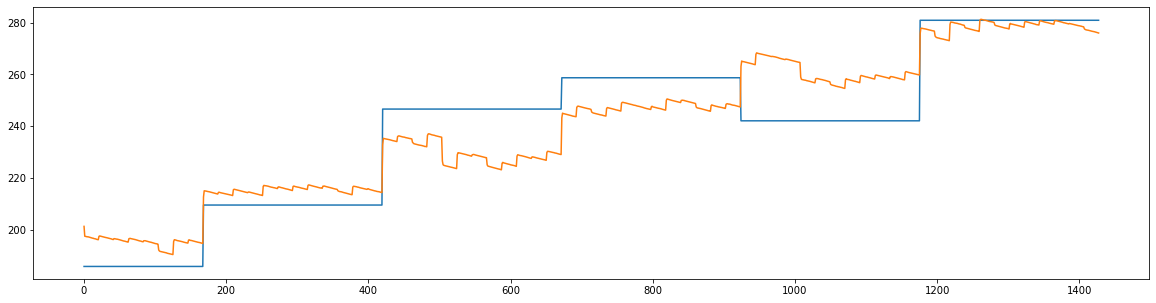

In [172]:
plt.plot(y)
plt.plot(predictions)
plt.show()